## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [261]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [262]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv # скачивание файла из гит
data = pd.read_csv('german_credit.csv', sep=',')

--2022-03-01 21:59:54--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275201 (269K) [text/plain]
Saving to: ‘german_credit.csv.6’

german_credit.csv.6 100%[===================>] 268.75K  --.-KB/s    in 0.1s    

2022-03-01 21:59:54 (2.03 MB/s) - ‘german_credit.csv.6’ saved [275201/275201]



In [263]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [264]:
data.tail(7)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
993,no checking account,18,all credits at this bank paid back duly,others,3966,unknown/no savings account,>= 7 yrs,>= 35,female : non-single or male : single,none,...,unknown / no property,33,bank,for free,4-5,skilled employee/official,0 to 2,yes (under customer name),no,bad
994,no checking account,12,delay in paying off in the past,furniture/equipment,6199,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,28,none,for free,2-3,skilled employee/official,0 to 2,yes (under customer name),no,bad
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [265]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [266]:
# показывает количество пропущенных значений (NaN) для каждого столбца. В данных нет пропусков
data.isnull().sum() 

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [267]:
data.select_dtypes(include='number').columns

Index(['duration', 'amount', 'age'], dtype='object')

In [268]:
# возможные бинарные признаки
df = data.nunique() 
df[df == 2]

people_liable     2
telephone         2
foreign_worker    2
credit_risk       2
dtype: int64

In [269]:
data.housing.unique()

array(['for free', 'rent', 'own'], dtype=object)

Числовые признаки: duration, amount, age (соответсвуют типу данных number)

Бинарные признаки: telephone (no/yes), foreign_worker (no/yes), credit_risk (good/bad) - имеют ровно 2 уникальных значения

Порядковые признаки:(от меньшего к большему) 
    - status (упорядочим 'no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year')
    - savings (упорядочим: 'unknown/no savings account', '... <  100 DM','100 <= ... <  500 DM', 
                '500 <= ... < 1000 DM', '... >= 1000 DM')
    - employment_duration (упорядочим: 'unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs')
    - installment_rate (упорядочим: '< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35')
    - people_liable (упорядочим: '0 to 2', '3 or more')
    - present_residence (упорядочим: '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs')
    - number_credits (упорядочим: '1', '2-3', '4-5', '>= 6')
    
Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [270]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [271]:
data['housing'].unique()

array(['for free', 'rent', 'own'], dtype=object)

In [272]:
res1 = data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0] * 100
print('%.3f' % res1)

66.667


In [273]:
res2 = data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0] * 100
print('%.3f' % res2)

68.015


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [274]:
data['foreign_worker'].unique()

array(['no', 'yes'], dtype=object)

In [275]:
data['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [276]:
n1 = data[(data['foreign_worker'] == 'yes') & (data['number_credits'] == '4-5')].shape[0]
n2 = data[(data['foreign_worker'] == 'yes') & (data['number_credits'] == '>= 6')].shape[0]
n1 + n2

1

### Задание 6 (1 балл)

In [277]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

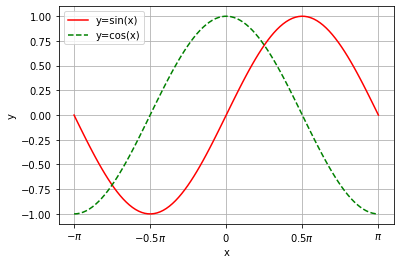

In [278]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.array(list(map(lambda t: np.sin(t), x)))
y2 = np.array(list(map(lambda t: np.cos(t), x)))
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.xticks([-np.pi,-0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$',r'$-0.5\pi$',r'$0$',r'$0.5\pi$',r'$\pi$'])
plt.plot(x, y1, 'r', label='y=sin(x)')
plt.plot(x, y2, 'g--', label='y=cos(x)')
plt.legend()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [279]:
df1 = data[data['credit_risk']=='good']
df2 = data[data['credit_risk']=='bad']

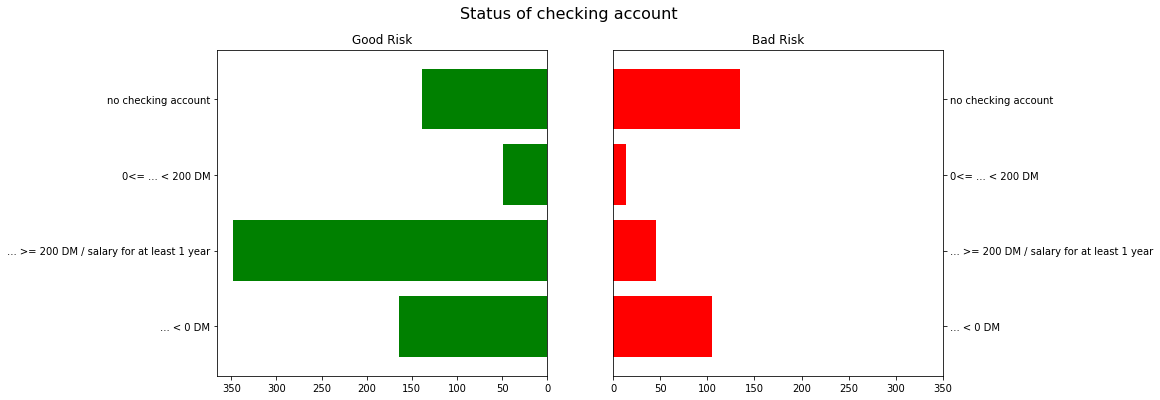

In [280]:
f = plt.figure(figsize=(13, 6))
f.suptitle('Status of checking account', fontsize=16)

ax = f.add_subplot(121)
df1["status"].value_counts().sort_index().plot(kind='barh', color='green', width=0.8)   
ax.invert_xaxis()
ax.set_title('Good Risk')


ax = f.add_subplot(122)
ax.yaxis.tick_right()
df2["status"].value_counts().sort_index().plot(kind='barh', color = 'red', width=0.8)             
ax.set_title("Bad Risk")
ax.set_xticks(np.arange(0, 351, step=50))

plt.show()

### Задание 8  (0.5 балла)

In [281]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

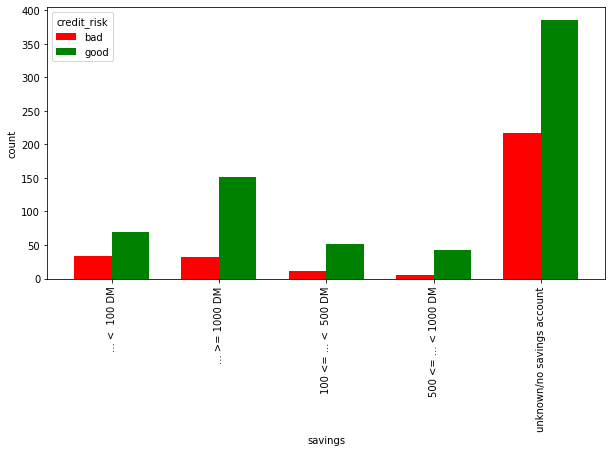

In [282]:
# вариант 1 - сводные таблицы
data.pivot_table('amount', 'savings', 'credit_risk', 'count').plot(kind='bar', color = ['red', 'green'], 
                                                                   figsize=(10, 5), width=0.7)
plt.ylabel("count")
plt.show()

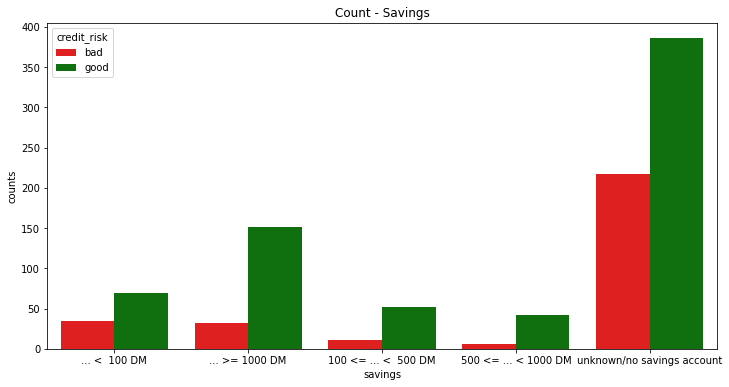

In [283]:
# вариант 2 - seaborn
prep_data = data.groupby(['savings', 'credit_risk']).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.barplot(x='savings', y='counts', data=prep_data, hue='credit_risk', palette=['red', 'green'], ci=None) 
# .size() to get the row counts
# When we reset the index, the old index is added as a column, and a new sequential index is used
plt.title('Count - Savings')
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

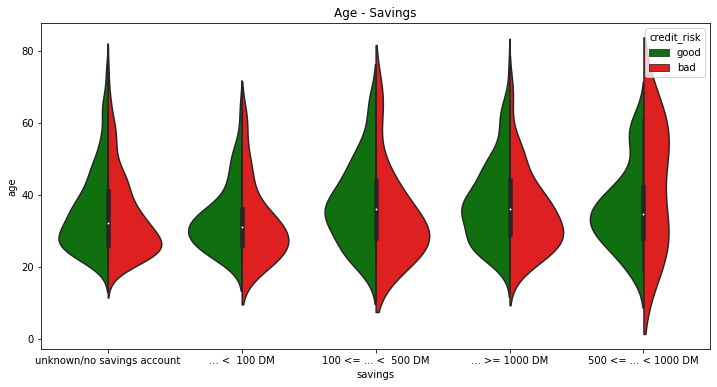

In [284]:
# скрипичная диаграмма
plt.figure(figsize=(12, 6))
sns.violinplot(x='savings', y='age', data=data, hue='credit_risk', palette=['green', 'red'], split=True)
plt.title('Age - Savings')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

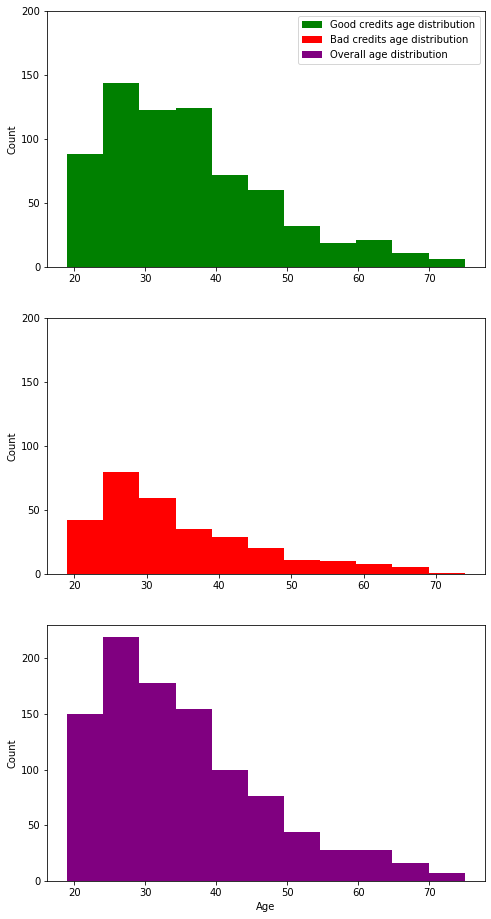

In [285]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 16))
  
# Creating the sub-plots.
ax1.hist(x='age', data=df1, color='green', bins=11, label="Good credits age distribution")
ax1.set_yticks(np.arange(0, 201, step=50))
ax1.set_ylabel("Count") 
  
ax2.hist(x='age', data=df2, color='red', bins=11, label="Bad credits age distribution")
ax2.set_yticks(np.arange(0, 201, step=50))
ax2.set_ylabel("Count") 

ax3.hist(x='age', data=data, color='purple', bins=11, label="Overall age distribution")
ax3.set_yticks(np.arange(0, 201, step=50))
ax3.set_ylabel("Count") 
ax3.set_xlabel("Age")
  
fig.legend(loc = 'upper right', bbox_to_anchor = (0.8, 0.88))
  
# Adjusting the sub-plots
plt.subplots_adjust(right=0.8)
  
plt.show() 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

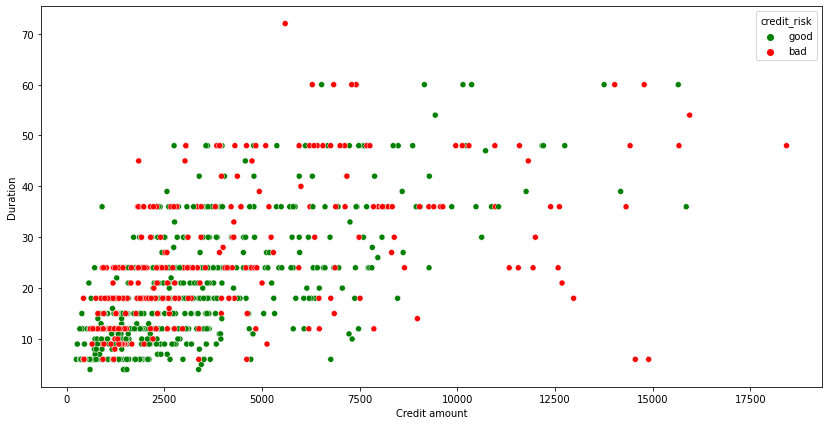

In [286]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x="amount", y="duration", data=data, hue='credit_risk', palette=['green', 'red'] )
plt.xlabel("Credit amount") 
plt.ylabel("Duration")

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

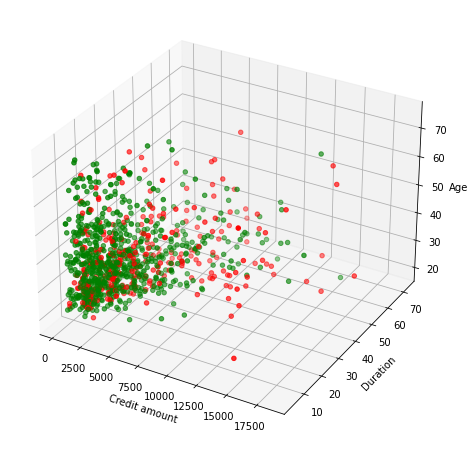

In [287]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection = '3d')

x = data['amount']
y = data['duration']
z = data['age']
divider = list(map(lambda x: 'green' if x == 'good' else 'red', data['credit_risk']))

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x, y, z, c=divider)

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [288]:
from sklearn.preprocessing import LabelEncoder

In [289]:
MLdata = data.copy(deep=True)

In [290]:
MLdata['credit_risk'] = MLdata['credit_risk'].apply(lambda x: 1 if x == 'good' else 0)
MLdata['foreign_worker'] = MLdata['foreign_worker'].apply(lambda x: 1 if x == 'yes' else 0)
MLdata['telephone'] = MLdata['telephone'].apply(lambda x: 0 if x == 'no' else 1)

MLdata['status'] = LabelEncoder().fit_transform(MLdata.status)
MLdata['savings'] = LabelEncoder().fit_transform(MLdata.savings)
MLdata['employment_duration'] = LabelEncoder().fit_transform(MLdata.employment_duration)
MLdata['installment_rate'] = LabelEncoder().fit_transform(MLdata.installment_rate)
MLdata['people_liable'] = LabelEncoder().fit_transform(MLdata.people_liable)
MLdata['present_residence'] = LabelEncoder().fit_transform(MLdata.present_residence)
MLdata['number_credits'] = LabelEncoder().fit_transform(MLdata.number_credits)

MLdata.drop(['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 
             'other_installment_plans', 'housing', 'job'], axis = 1, inplace = True)

MLdata

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1049,4,2,2,3,21,0,0,0,0,1
1,3,9,2799,4,0,1,0,36,1,1,0,0,1
2,0,12,841,0,1,1,3,23,0,0,0,0,1
3,3,12,2122,4,0,0,0,39,1,1,0,1,1
4,3,12,2171,4,0,2,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,1987,4,0,1,3,21,0,1,0,0,0
996,3,24,2303,4,3,2,2,45,0,0,0,0,0
997,1,21,12680,1,3,2,3,30,0,0,1,0,0
998,0,12,6468,1,4,1,2,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [291]:
data = MLdata

In [292]:
def predict(Xtest: np.array) -> np.array:
    y_pred = []
    for arr in Xtest:
        if arr[7] < 40 and arr[3]==2 or arr[1]<15 and arr[2] < 1500 or arr[0] == 1 :
            y_pred.append(1)
        else:
            y_pred.append(0)
    return np.array(y_pred)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/tmp/ipykernel_278/2937527799.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.64